In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Transformation - second derivatives primary

This transformation is:

$z_0 = (x_0 + ... + x_{N-1})/N$

$z_{N-1} = x_{N-1} - x_0$

$z_i = x_{i-1} -2 x_i + x_{i+1} \, \mathrm{for} \, i = 1, 2, ..., N-2$

In [10]:
N = 7
A_x2z = np.zeros((N, N), dtype=np.float64)
A_x2z[0, :] = 1/N  # z_0
for i in range(1, N-1):  # z_1, ..., z_N-2
    A_x2z[i, i-1] = +1.0
    A_x2z[i, i  ] = -2.0
    A_x2z[i, i+1] = +1.0
A_x2z[-1, 0 ] = -1.0
A_x2z[-1, -1] = +1.0

In [11]:
A_x2z

array([[ 0.14285714,  0.14285714,  0.14285714,  0.14285714,  0.14285714,
         0.14285714,  0.14285714],
       [ 1.        , -2.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        , -2.        ,  1.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , -2.        ,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        , -2.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -2.        ,  1.        ],
       [-1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ]])

In [12]:
np.linalg.inv(A_x2z)

array([[ 1.00000000e+00,  3.57142857e-01,  5.71428571e-01,
         6.42857143e-01,  5.71428571e-01,  3.57142857e-01,
        -5.00000000e-01],
       [ 1.00000000e+00, -4.76190476e-01, -9.52380952e-02,
         1.42857143e-01,  2.38095238e-01,  1.90476190e-01,
        -3.33333333e-01],
       [ 1.00000000e+00, -3.09523810e-01, -7.61904762e-01,
        -3.57142857e-01, -9.52380952e-02,  2.38095238e-02,
        -1.66666667e-01],
       [ 1.00000000e+00, -1.42857143e-01, -4.28571429e-01,
        -8.57142857e-01, -4.28571429e-01, -1.42857143e-01,
         4.16333634e-17],
       [ 1.00000000e+00,  2.38095238e-02, -9.52380952e-02,
        -3.57142857e-01, -7.61904762e-01, -3.09523810e-01,
         1.66666667e-01],
       [ 1.00000000e+00,  1.90476190e-01,  2.38095238e-01,
         1.42857143e-01, -9.52380952e-02, -4.76190476e-01,
         3.33333333e-01],
       [ 1.00000000e+00,  3.57142857e-01,  5.71428571e-01,
         6.42857143e-01,  5.71428571e-01,  3.57142857e-01,
         5.0000000

# Transformation - first derivatives primary

This transformation is:

$z_0 = x_0$

$z_i = z_i - z_{i-1} \, \mathrm{for} \, i \ge 1$

In [24]:
# Manually computing matrix of second derivatives (and ignoring h^{-4} factor) produces this:
N = 5
second_deriv_mat = np.zeros((N, N), dtype=np.float64)

second_deriv_mat[1, 1] = +1.0
second_deriv_mat[1, 2] = -1.0
for i in range(2, N-1):
    second_deriv_mat[i, i-1] = -1
    second_deriv_mat[i, i  ] = +2
    second_deriv_mat[i, i+1] = -1
second_deriv_mat[N-1, N-2] = -1
second_deriv_mat[N-1, N-1] = +1

In [25]:
second_deriv_mat

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0., -1.,  1.]])

In [26]:
np.linalg.eigh(second_deriv_mat)

EighResult(eigenvalues=array([-9.74614466e-17,  0.00000000e+00,  5.85786438e-01,  2.00000000e+00,
        3.41421356e+00]), eigenvectors=array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [-0.5       ,  0.        ,  0.65328148,  0.5       , -0.27059805],
       [-0.5       ,  0.        ,  0.27059805, -0.5       ,  0.65328148],
       [-0.5       ,  0.        , -0.27059805, -0.5       , -0.65328148],
       [-0.5       ,  0.        , -0.65328148,  0.5       ,  0.27059805]]))

In [30]:
evals_sorted = sorted(list(np.linalg.eigvalsh(second_deriv_mat)))
ratio_non_zeros = evals_sorted[-1] / evals_sorted[2]
print(ratio_non_zeros)

5.828427124746188


Text(0.5, 0, 'N')

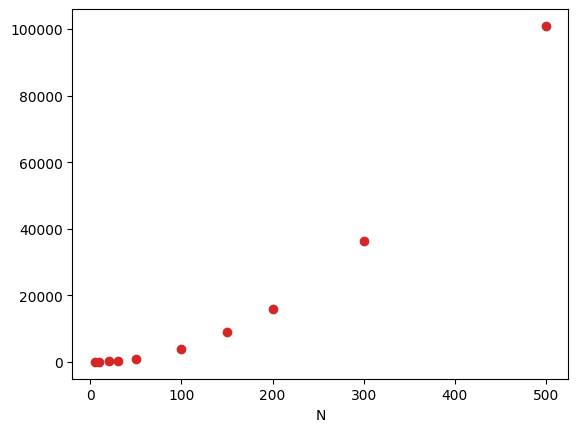

In [31]:
N_vals = [5, 10, 20, 30, 50, 100, 150, 200, 300, 500]
ratios = []
for N in N_vals:
    second_deriv_mat = np.zeros((N, N), dtype=np.float64)

    second_deriv_mat[1, 1] = +1.0
    second_deriv_mat[1, 2] = -1.0
    for i in range(2, N-1):
        second_deriv_mat[i, i-1] = -1
        second_deriv_mat[i, i  ] = +2
        second_deriv_mat[i, i+1] = -1
    second_deriv_mat[N-1, N-2] = -1
    second_deriv_mat[N-1, N-1] = +1

    evals_sorted = sorted(list(np.linalg.eigvalsh(second_deriv_mat)))
    ratio_non_zeros = evals_sorted[-1] / evals_sorted[2]
    ratios.append(ratio_non_zeros)

fig, ax = plt.subplots()
ax.plot(N_vals, ratios, ls='none', marker='o', color='tab:red')
ax.set_xlabel('N')

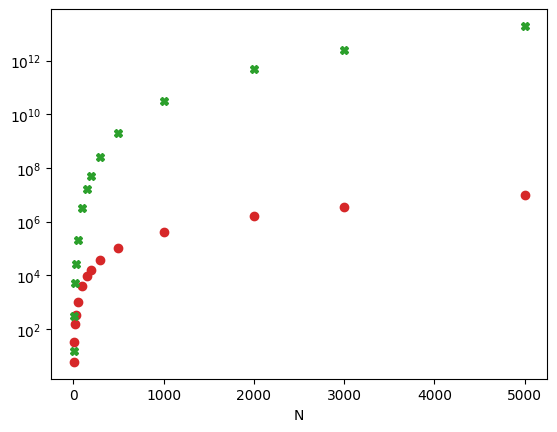

In [3]:
# Compare to the values for the original equations
N_vals = [5, 10, 20, 30, 50, 100, 150, 200, 300, 500, 1000, 2000, 3000, 5000]
ratios = []
ratios_no_transformation = []
for N in N_vals:
    second_deriv_mat = np.zeros((N, N), dtype=np.float64)

    second_deriv_mat[1, 1] = +1.0
    second_deriv_mat[1, 2] = -1.0
    for i in range(2, N-1):
        second_deriv_mat[i, i-1] = -1
        second_deriv_mat[i, i  ] = +2
        second_deriv_mat[i, i+1] = -1
    second_deriv_mat[N-1, N-2] = -1
    second_deriv_mat[N-1, N-1] = +1

    evals_sorted = sorted(list(np.linalg.eigvalsh(second_deriv_mat)))
    ratio_non_zeros = evals_sorted[-1] / evals_sorted[2]
    ratios.append(ratio_non_zeros)

    # Eigenvalues for untransformed system
    def get_evals(n):
        A = np.zeros((n, n))
        for i in range(2, n-2):
            A[i, i-2] = 0.5
            A[i, i-1] = -2
            A[i, i] = 3
            A[i, i+1] = -2
            A[i, i+2] = 0.5
        # First row
        A[0, 0] = 0.5
        A[0, 1] = -1
        A[0, 2] = 0.5
        # Second row
        A[1, 0] = -1
        A[1, 1] = 5/2
        A[1, 2] = -2
        A[1, 3] = 0.5
        # Second from last row
        A[n-2, n-4] = 0.5
        A[n-2, n-3] = -2
        A[n-2, n-2] = 5/2
        A[n-2, n-1] = -1
        # Last row
        A[n-1, n-3] = 0.5
        A[n-1, n-2] = -1
        A[n-1, n-1] = 0.5
    
        return np.linalg.eigh(A)
    evals_orig_sorted = sorted(list(get_evals(N)[0]))
    ratios_no_transformation.append(evals_orig_sorted[-1] / evals_orig_sorted[2])

fig, ax = plt.subplots()
ax.plot(N_vals, ratios, ls='none', marker='o', color='tab:red')
ax.plot(N_vals, ratios_no_transformation, ls='none', marker='X', color='tab:green')
ax.set_xlabel('N')
ax.set_yscale('log')

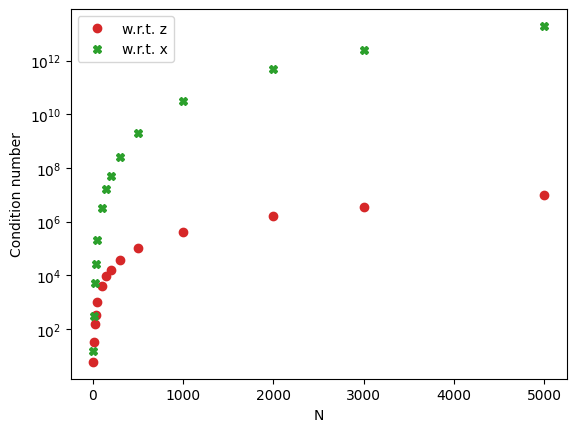

In [9]:
fig, ax = plt.subplots()
ax.plot(N_vals, ratios, ls='none', marker='o', color='tab:red', label='w.r.t. z')
ax.plot(N_vals, ratios_no_transformation, ls='none', marker='X', color='tab:green', label='w.r.t. x')
ax.set_xlabel('N')
ax.set_yscale('log')
ax.set_ylabel('Condition number')
ax.legend()
fig.savefig('condition_numbers.png')

In [4]:
ratios_no_transformation[5]

np.float64(3194461.1306211515)

In [5]:
ratios[5]

np.float64(3971.5290336324047)